# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [38]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [40]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

# print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

# print(list(newsgroups_train.target_names))

In [41]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [42]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [43]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding




In [44]:
X, y = list(map(get_review_embedding, newsgroups_train.data)), np.array(newsgroups_train.target)

In [45]:
import pandas as pd

In [46]:
# pd.DataFrame(np.array(X)).shape

In [47]:
# X = pd.DataFrame(np.array(X))

In [48]:
# X

In [49]:
# X.to_csv('embedding_train2.csv')

In [50]:
# from google.colab import drive
# drive.mount('/content/drive')

In [51]:
# X = pd.read_csv('drive/My Drive/embedding_train2.csv', index_col = 0)
# y = np.array(newsgroups_train.target)

In [52]:
# X = X.loc[(X!=0).any(axis=1)]

In [53]:
# xx = X.astype(np.float16)

In [54]:
# xx = xx.fillna(0.0)

In [55]:
# xx.shape

In [56]:
xx = X

In [57]:
# X = X[(X!=0).any(axis=1)]

In [58]:
# y.shape

In [59]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




Cumulative variance explained by 2 principal components: 78.27%


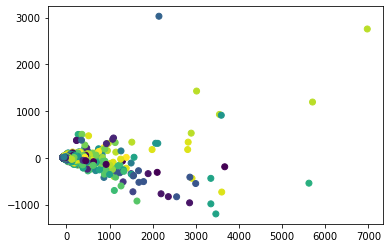

In [60]:

pca = PCA(n_components=2)
Xt = pca.fit_transform(xx)
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
# plt.legend(handles=plot.legend_elements()[0])
plt.show()

# K_Means Algorithm


In [61]:
# np.random.

In [62]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans

kmeans = KMeans(random_state=4).fit(xx)
kmeans.labels_


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

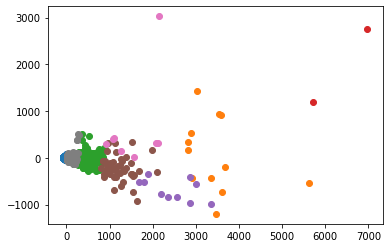

In [63]:
unique_labels = np.unique(kmeans.labels_)
for i in unique_labels:
    plt.scatter(Xt[kmeans.labels_ == i , 0] , Xt[kmeans.labels_== i , 1] , label = i)
plt.show()

In [64]:
#code for visualisation of clusters





# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







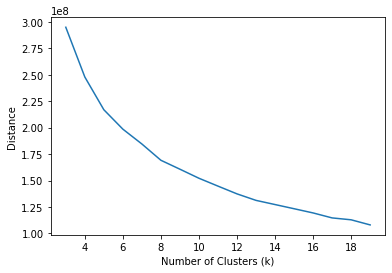

In [65]:
def elbow_method():
    range_n_clusters = list(range(3,20))
    avg_distance=[]
    for n_clusters in range_n_clusters:
      clusterer = KMeans(n_clusters=n_clusters, random_state=42).fit(xx)
      avg_distance.append(clusterer.inertia_)

    plt.plot(range_n_clusters, avg_distance)
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Distance")
    plt.show()


elbow_method()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5

# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




In [66]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


In [69]:
def silhouette_score_():
    range_n_clusters = [2, 3, 4, 5, 6]
    silhouette_avg_n_clusters = []

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = clusterer.fit_predict(xx)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(xx, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        silhouette_avg_n_clusters.append(silhouette_avg)
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(xx, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(xx[0], xx[1], marker='.', s=30, lw=0, alpha=0.7,
                    # c=colors, 
                    edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                    fontsize=14, fontweight='bold')

        plt.show()


    plt.plot(range_n_clusters, silhouette_avg_n_clusters)
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("silhouette score")
    plt.show()



For n_clusters = 2 The average silhouette_score is : 0.9514840141110001


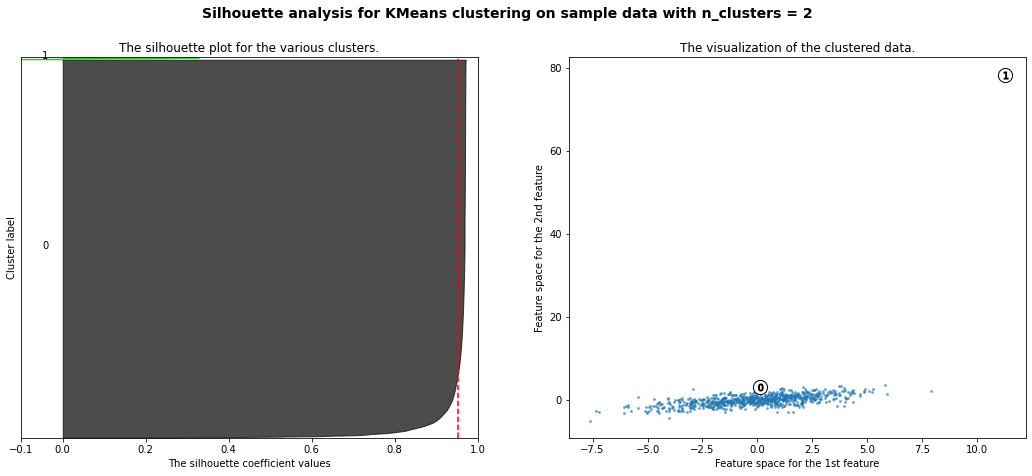

For n_clusters = 3 The average silhouette_score is : 0.8217664321624301


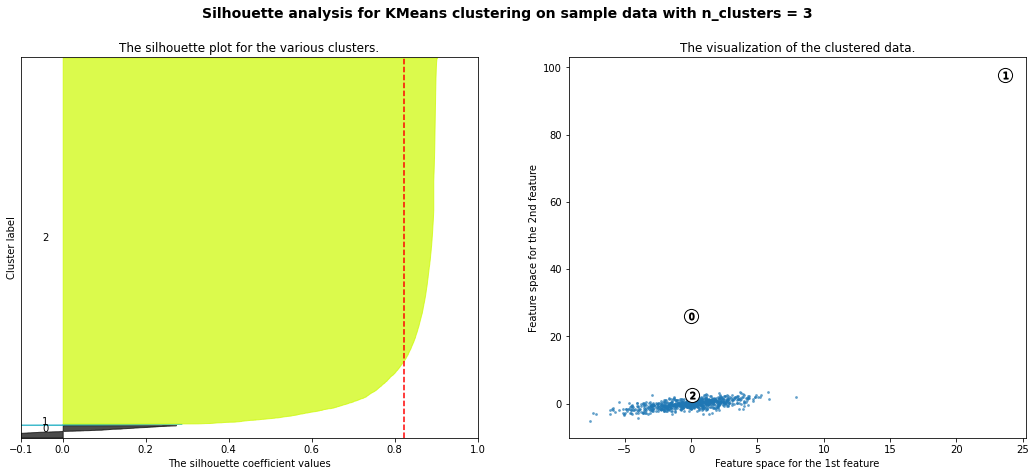

For n_clusters = 4 The average silhouette_score is : 0.7205692019070626


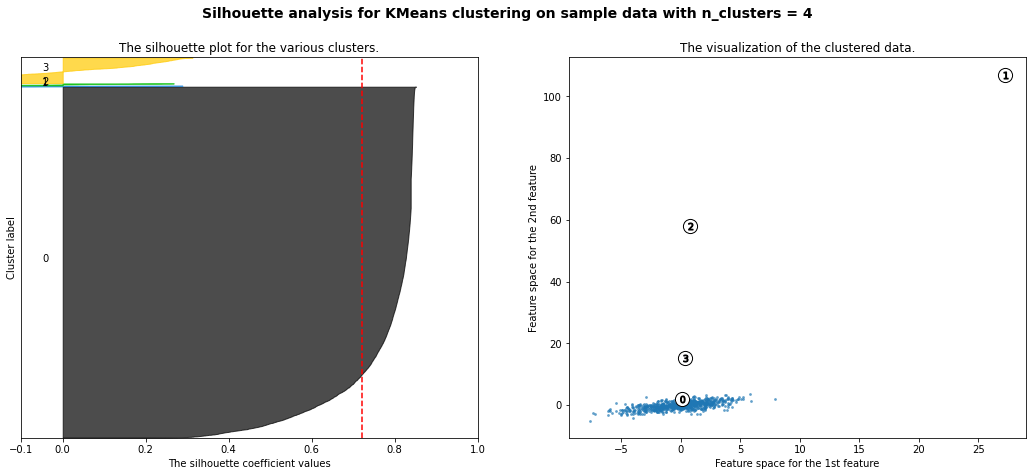

For n_clusters = 5 The average silhouette_score is : 0.6905373798176357


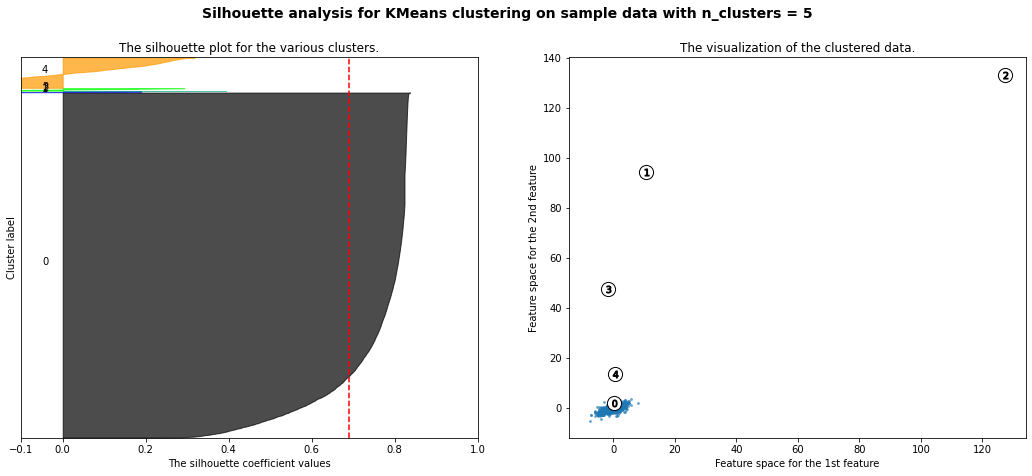

For n_clusters = 6 The average silhouette_score is : 0.52081904942706


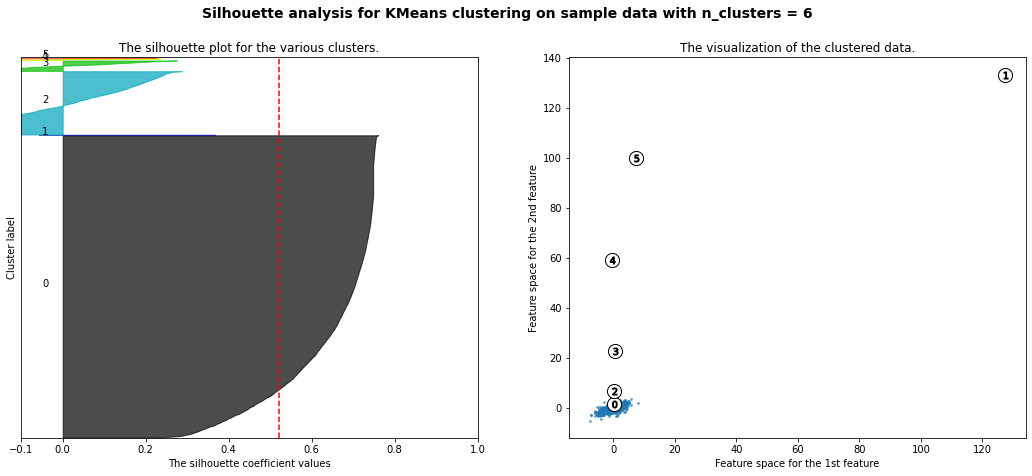

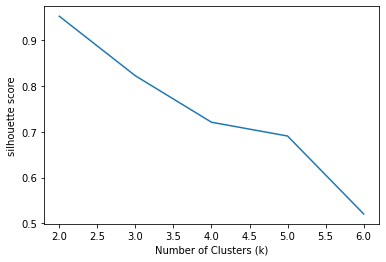

In [70]:
silhouette_score_()

The no of clusters here are calculated by the finding the max value of silhoutte score, thus comes out as **2**.

# Agglomerative clustering

In [71]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

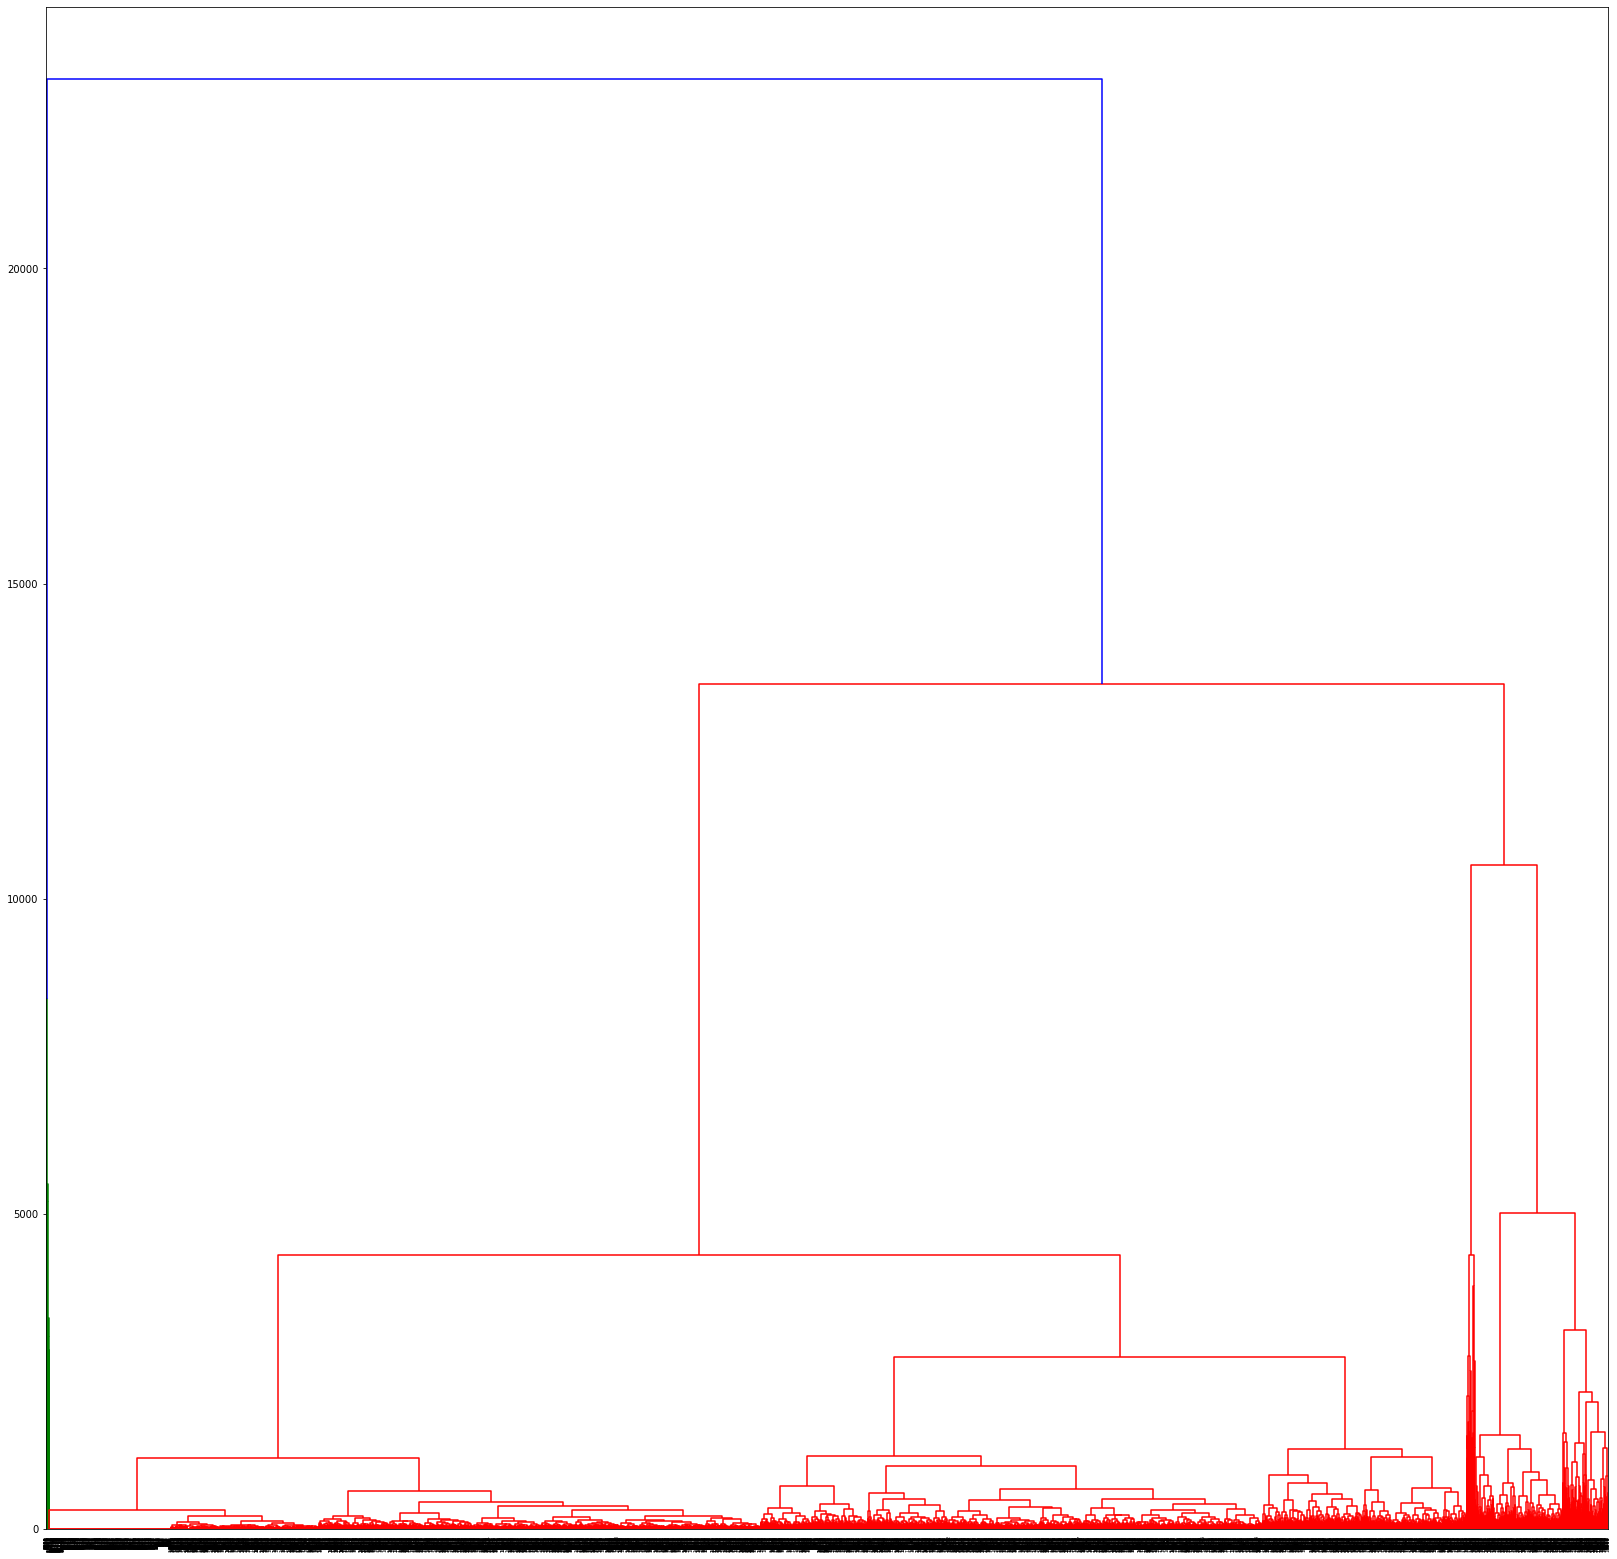

In [72]:
plt.figure(figsize=(28,28))
dend = dendrogram(linkage(xx, method='ward'))

In [73]:
print(dend['color_list'])

['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',

In [74]:
colors = set(dend['color_list'])

In [75]:
n_cluster = len(colors) - 1

In [76]:
clustering = AgglomerativeClustering(n_clusters=n_cluster, affinity='euclidean').fit(xx)
label = clustering.labels_

unique_labels = np.unique(clustering.labels_)

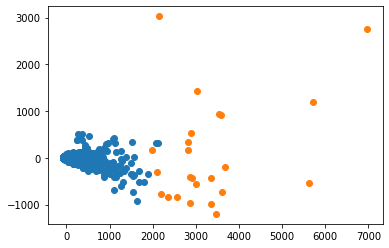

In [77]:
#code for visualisation of clusters

for i in unique_labels:
    plt.scatter(Xt[clustering.labels_ == i , 0] , Xt[clustering.labels_== i , 1] , label = i)
plt.show()



In [78]:
# # code to write your Kmeans algorithm
# #implement your KMeans algorithm here, and visualise the clusters obtained 

# def plot_dendrogram(model, **kwargs):
#     # Create linkage matrix and then plot the dendrogram

#     # create the counts of samples under each node
#     counts = np.zeros(model.children_.shape[0])
#     n_samples = len(model.labels_)
#     for i, merge in enumerate(model.children_):
#         current_count = 0
#         for child_idx in merge:
#             if child_idx < n_samples:
#                 current_count += 1  # leaf node
#             else:
#                 current_count += counts[child_idx - n_samples]
#         counts[i] = current_count

#     linkage_matrix = np.column_stack(
#         [model.children_, model.distances_, counts]
#     ).astype(float)

#     # Plot the corresponding dendrogram
#     dendrogram(linkage_matrix, **kwargs)

# def AgglomerativeClustering(n_cluster):
#     clustering = AgglomerativeClustering(n_clusters=n_cluster, ).fit(xx)
#     clustering.labels_
#     # plt.title("Hierarchical Clustering Dendrogram")
#     # # plot the top three levels of the dendrogram
#     # plot_dendrogram(clustering, truncate_mode="level", p=3)
#     # plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#     # plt.show()
    
# AgglomerativeClustering()

# Dendogram


*   Try to understand the difference between agglomerative clustering and hierarchical clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

- Agglomerative: This is a "bottom up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

- Divisive: This is a "top down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram.

Hierarchical Agglomerative vs Divisive clustering – 

- Divisive clustering is *more* complex as compared to agglomerative clustering, as in the case of divisive clustering we need a flat clustering method as “subroutine” to split each cluster until we have each data having its own singleton cluster.
- Divisive clustering is *more* efficient if we do not generate a complete hierarchy all the way down to individual data leaves. The time complexity of a naive agglomerative clustering is O(n3) because we exhaustively scan the N x N matrix dist_mat for the lowest distance in each of N-1 iterations. Using priority queue data structure we can reduce this complexity to O(n2logn). By using some more optimizations it can be brought down to O(n2). Whereas for divisive clustering given a fixed number of top levels, using an efficient flat algorithm like K-Means, divisive algorithms are linear in the number of patterns and clusters.
- A divisive algorithm is also *more* accurate. Agglomerative clustering makes decisions by considering the local patterns or neighbor points without initially taking into account the global distribution of data. These early decisions cannot be undone. whereas divisive clustering takes into consideration the global distribution of data when making top-level partitioning decisions.

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


